In [1]:
%matplotlib inline


*************************
Text rendering With LaTeX
*************************

Rendering text with LaTeX in Matplotlib.

Matplotlib has the option to use LaTeX to manage all text layout.  This
option is available with the following backends:

* Agg
* PS
* PDF

The LaTeX option is activated by setting ``text.usetex : True`` in your rc
settings.  Text handling with matplotlib's LaTeX support is slower than
matplotlib's very capable :doc:`mathtext </tutorials/text/mathtext>`, but is
more flexible, since different LaTeX packages (font packages, math packages,
etc.) can be used. The results can be striking, especially when you take care
to use the same fonts in your figures as in the main document.

Matplotlib's LaTeX support requires a working LaTeX_ installation, dvipng_
(which may be included with your LaTeX installation), and Ghostscript_
(GPL Ghostscript 9.0 or later is required). The executables for these
external dependencies must all be located on your :envvar:`PATH`.

There are a couple of options to mention, which can be changed using
:doc:`rc settings </tutorials/introductory/customizing>`. Here is an example
matplotlibrc file::

  font.family        : serif
  font.serif         : Times, Palatino, New Century Schoolbook, Bookman, Computer Modern Roman
  font.sans-serif    : Helvetica, Avant Garde, Computer Modern Sans serif
  font.cursive       : Zapf Chancery
  font.monospace     : Courier, Computer Modern Typewriter

  text.usetex        : true

The first valid font in each family is the one that will be loaded. If the
fonts are not specified, the Computer Modern fonts are used by default. All of
the other fonts are Adobe fonts. Times and Palatino each have their own
accompanying math fonts, while the other Adobe serif fonts make use of the
Computer Modern math fonts. See the PSNFSS_ documentation for more details.

To use LaTeX and select Helvetica as the default font, without editing
matplotlibrc use::

  from matplotlib import rc
  rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
  ## for Palatino and other serif fonts use:
  #rc('font',**{'family':'serif','serif':['Palatino']})
  rc('text', usetex=True)

Here is the standard example, `tex_demo.py`:

.. figure:: ../../gallery/text_labels_and_annotations/images/sphx_glr_tex_demo_001.png
   :target: ../../gallery/text_labels_and_annotations/tex_demo.html
   :align: center
   :scale: 50

   TeX Demo

Note that display math mode (``$$ e=mc^2 $$``) is not supported, but adding the
command ``\displaystyle``, as in `tex_demo.py`, will produce the same
results.

<div class="alert alert-info"><h4>Note</h4><p>Certain characters require special escaping in TeX, such as::

     # $ % & ~ _ ^ \ { } \( \) \[ \]

   Therefore, these characters will behave differently depending on
   the rcParam ``text.usetex`` flag.</p></div>


usetex with unicode
===================

It is also possible to use unicode strings with the LaTeX text manager, here is
an example taken from `tex_demo.py`. The axis labels include Unicode text:

.. figure:: ../../gallery/text_labels_and_annotations/images/sphx_glr_tex_demo_001.png
   :target: ../../gallery/text_labels_and_annotations/tex_demo.html
   :align: center
   :scale: 50

   TeX Unicode Demo


Postscript options
==================

In order to produce encapsulated postscript files that can be embedded in a new
LaTeX document, the default behavior of matplotlib is to distill the output,
which removes some postscript operators used by LaTeX that are illegal in an
eps file. This step produces results which may be unacceptable to some users,
because the text is coarsely rasterized and converted to bitmaps, which are not
scalable like standard postscript, and the text is not searchable. One
workaround is to set ``ps.distiller.res`` to a higher value (perhaps 6000)
in your rc settings, which will produce larger files but may look better and
scale reasonably. A better workaround, which requires Poppler_ or Xpdf_, can be
activated by changing the ``ps.usedistiller`` rc setting to ``xpdf``. This
alternative produces postscript without rasterizing text, so it scales
properly, can be edited in Adobe Illustrator, and searched text in pdf
documents.


Possible hangups
================

* On Windows, the :envvar:`PATH` environment variable may need to be modified
  to include the directories containing the latex, dvipng and ghostscript
  executables. See `environment-variables` and
  `setting-windows-environment-variables` for details.

* Using MiKTeX with Computer Modern fonts, if you get odd \*Agg and PNG
  results, go to MiKTeX/Options and update your format files

* On Ubuntu and Gentoo, the base texlive install does not ship with
  the type1cm package. You may need to install some of the extra
  packages to get all the goodies that come bundled with other latex
  distributions.

* Some progress has been made so matplotlib uses the dvi files
  directly for text layout. This allows latex to be used for text
  layout with the pdf and svg backends, as well as the \*Agg and PS
  backends. In the future, a latex installation may be the only
  external dependency.


Troubleshooting
===============

* Try deleting your :file:`.matplotlib/tex.cache` directory. If you don't know
  where to find :file:`.matplotlib`, see `locating-matplotlib-config-dir`.

* Make sure LaTeX, dvipng and ghostscript are each working and on your
  :envvar:`PATH`.

* Make sure what you are trying to do is possible in a LaTeX document,
  that your LaTeX syntax is valid and that you are using raw strings
  if necessary to avoid unintended escape sequences.

* Most problems reported on the mailing list have been cleared up by
  upgrading Ghostscript_. If possible, please try upgrading to the
  latest release before reporting problems to the list.

* The ``text.latex.preamble`` rc setting is not officially supported. This
  option provides lots of flexibility, and lots of ways to cause
  problems. Please disable this option before reporting problems to
  the mailing list.

* If you still need help, please see `reporting-problems`



/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


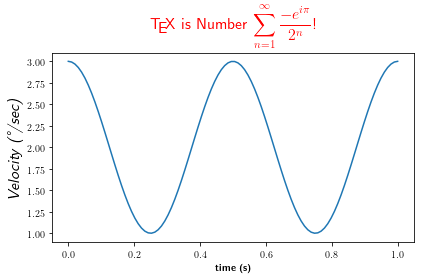

In [2]:
import numpy as np
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt


t = np.linspace(0.0, 1.0, 100)
s = np.cos(4 * np.pi * t) + 2

fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
ax.plot(t, s)

ax.set_xlabel(r'\textbf{time (s)}')
ax.set_ylabel('\\textit{Velocity (\N{DEGREE SIGN}/sec)}', fontsize=16)
ax.set_title(r'\TeX\ is Number $\displaystyle\sum_{n=1}^\infty'
             r'\frac{-e^{i\pi}}{2^n}$!', fontsize=16, color='r')
plt.show()

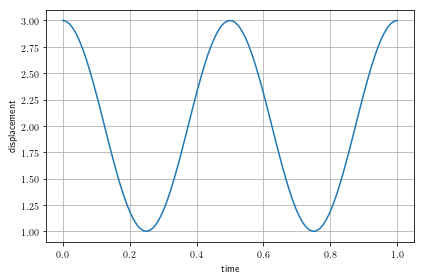

In [4]:
plt.plot(t,s)
plt.xlabel('time')
plt.ylabel('displacement')
plt.grid(True)

plt.tight_layout()
plt.show()

In [5]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']
